# Data Exploration and Preparation Steps

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('D:\Data/train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### Step 1: Variable Identification

#### Task 1: Identifying the type of varible(target/predictive variable)

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Id & SalePrice is target variables and rest is predictive variables

In [5]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

#### Task 2: Identifying the data types of the variable (Numerical / Categorical variable)

In [9]:
Data_dict = pd.DataFrame(df.dtypes)
Data_dict

0
Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
...                ...
MoSold           int64
YrSold           int64
SaleType        object
SaleCondition   object
SalePrice        int64

[81 rows x 1 columns]

int64 - numerical variables,
object - categorical variables

#### bifurcating the columns

In [14]:
# All the Categorical coln
categorical_col = df.select_dtypes(include = 'object')
categorical_col.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
# All the Numerical coln
numerical_col = df.select_dtypes(include = ['int64','float'])
numerical_col.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float'])
print('Categorical columns',categorical_col.columns)
print('Numerical Columns',numerical_col.columns)

Categorical columns Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Columns Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath

In [32]:
#Count of the columns
total_count_categorical = len(categorical_col.columns)
total_count_numerical = len(numerical_col.columns)
print('Categorical col:',total_count_categorical)
print('Numerical col:',total_count_numerical)

Categorical col: 43
Numerical col: 38


### Step 2: Univariate Analysis

In [33]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [39]:
def univariate_plot_analysis(df, feature):
 
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\3142196911.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


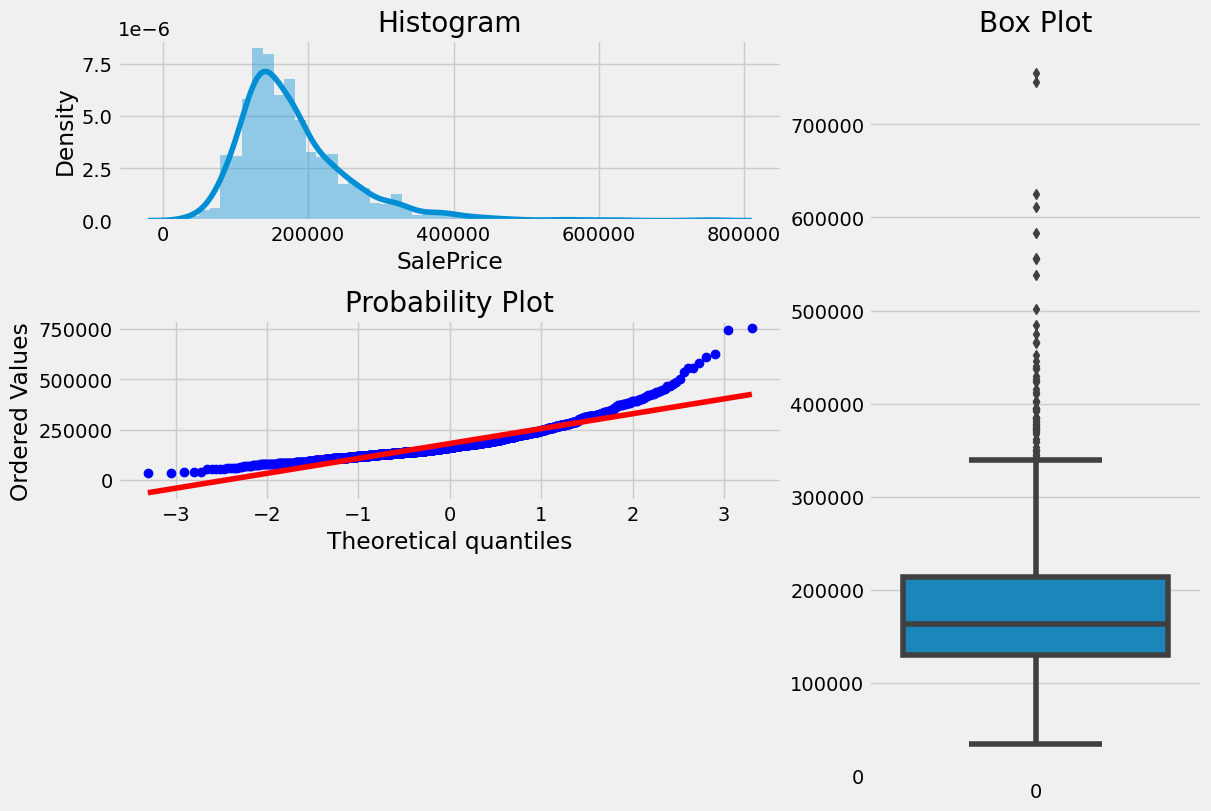

In [40]:
# Calling the func
univariate_plot_analysis(df,"SalePrice")

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\3142196911.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


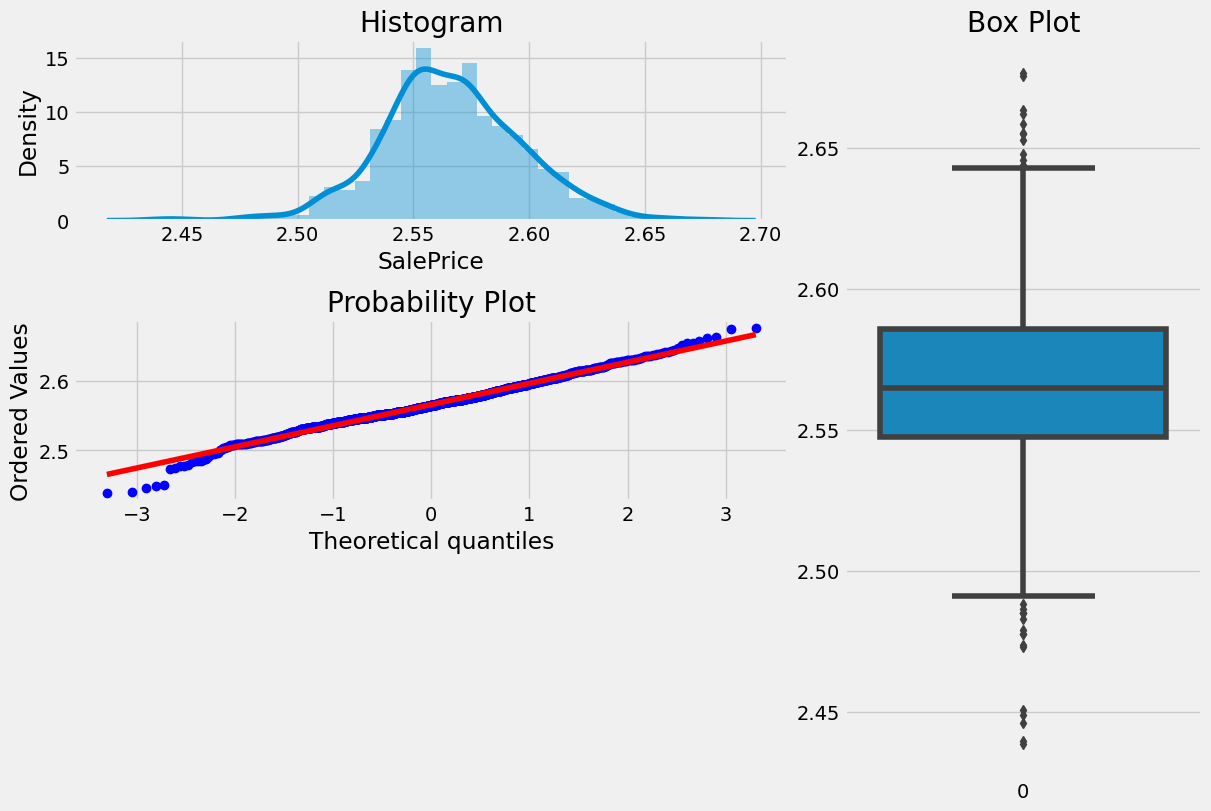

In [42]:
# To make is as normally distributed data
df["SalePrice"]=np.log1p(df["SalePrice"])
univariate_plot_analysis(df,"SalePrice")

In [49]:
# All thhe plots for predictive var (numerical)
numeric_col=df.dtypes[df.dtypes!='object'].index
numeric_col=numeric_col.drop("SalePrice")

categorical_col_idx=df.dtypes[df.dtypes=="object"].index

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\HP\anaconda3\Lib\site-packa

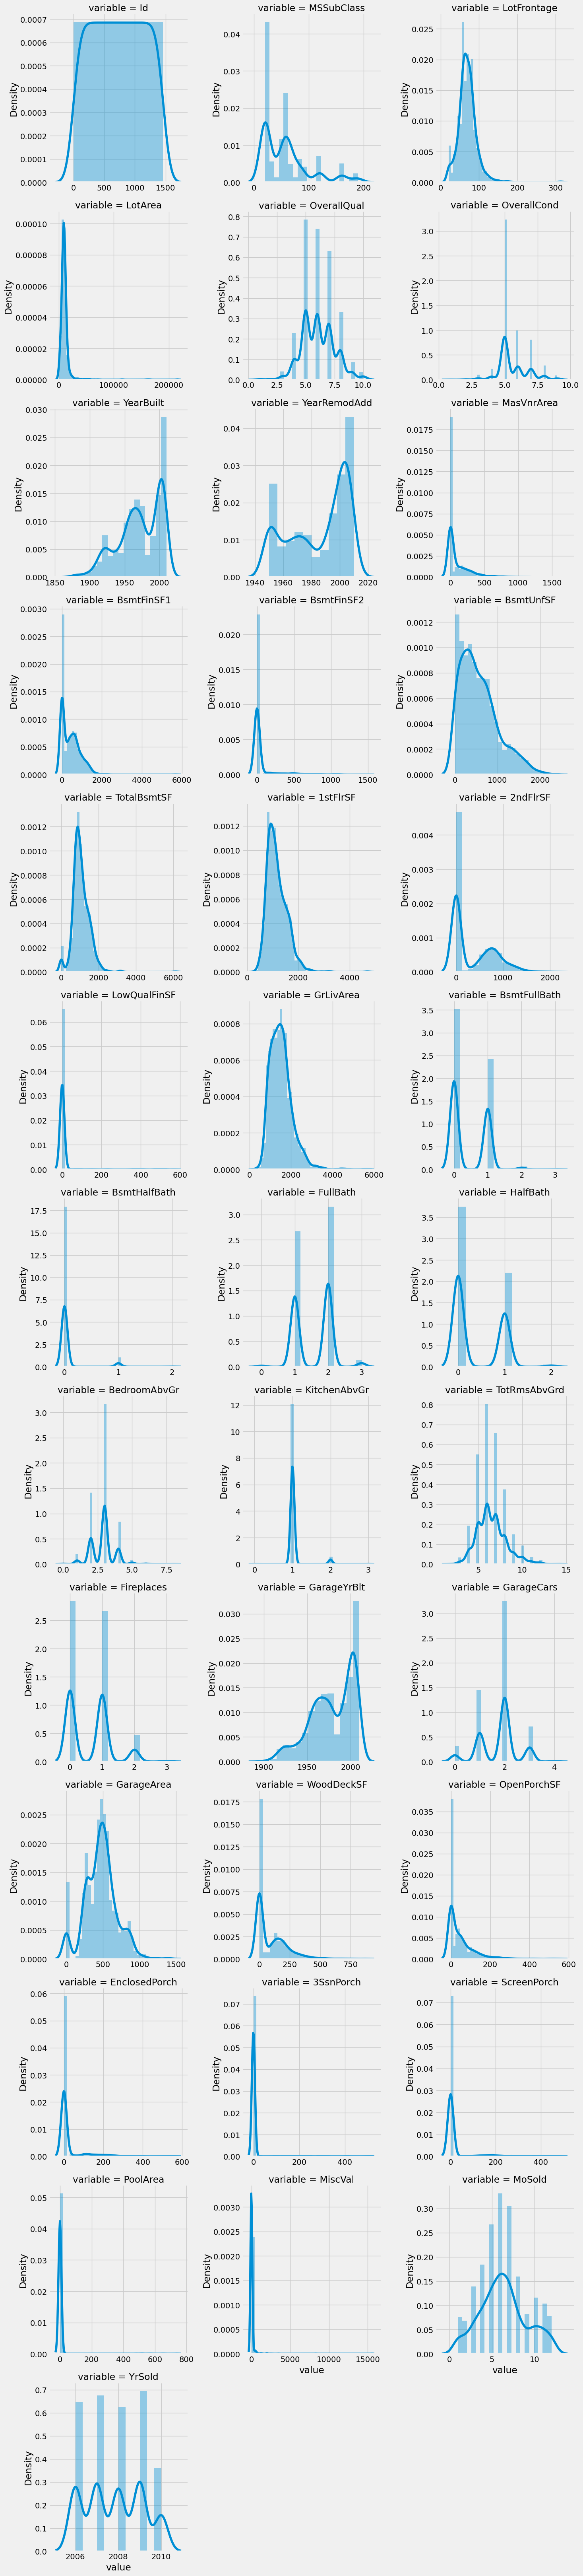

In [50]:
f=pd.melt(df,value_vars=numeric_col)
g=sns.FacetGrid(f,col="variable",col_wrap=3,sharex=False,sharey=False,height=5)
g=g.map(sns.distplot,"value")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


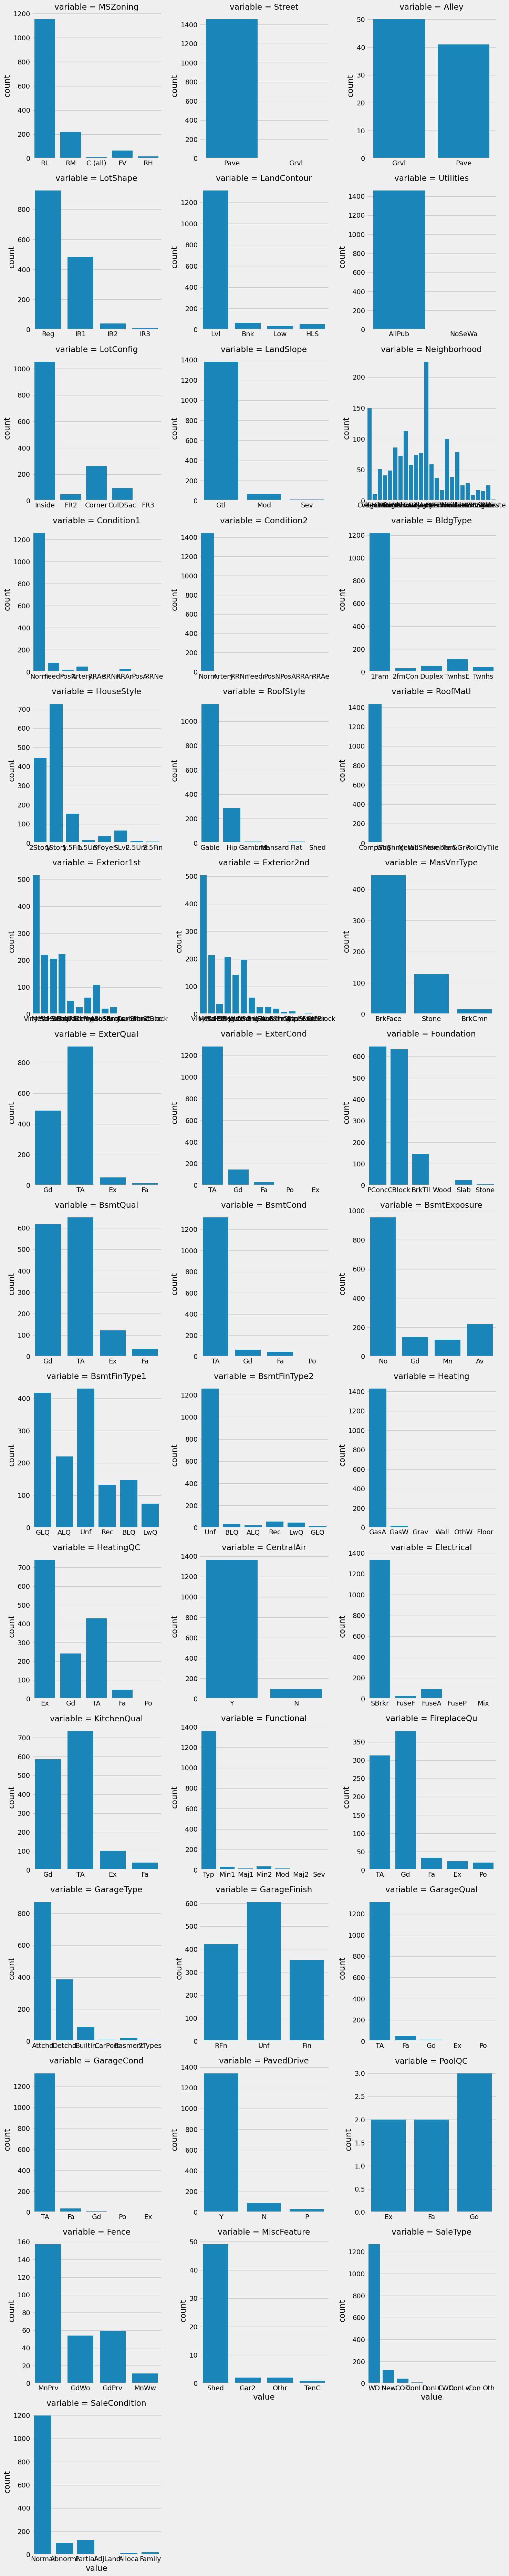

In [53]:
# All thhe plots for predictive var (count plot for each categorical var)
f=pd.melt(df,value_vars=categorical_col_idx)
g=sns.FacetGrid(f,col="variable",col_wrap=3,sharex=False,sharey=False,height=5)
g=g.map(sns.countplot,"value")
plt.show()

In [54]:
#To verify the above info is correct
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [55]:
df["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

### Step 3: Bivariate Analysis

#### Continous VS Continous

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


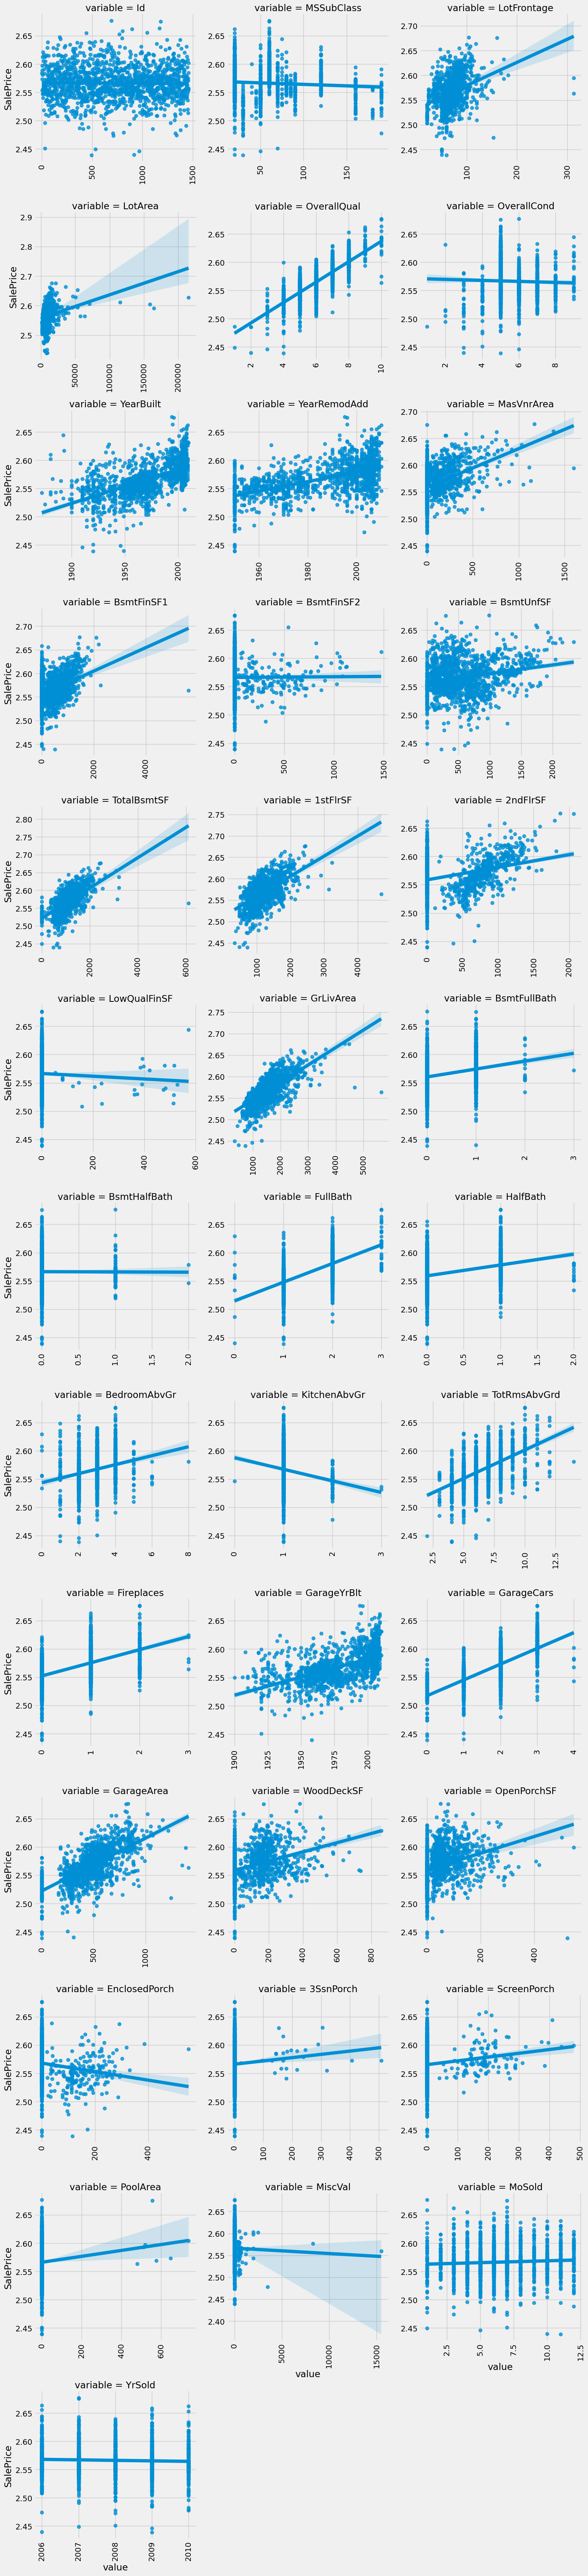

In [57]:
def regplot(x,y,**kwargs):
    sns.regplot(x=x,y=y)
    x=plt.xticks(rotation=90)

f=pd.melt(df,id_vars=['SalePrice'], value_vars=numeric_col)
g=sns.FacetGrid(f,col="variable",col_wrap=3,sharex=False,sharey=False,height=5)
g=g.map(regplot,"value","SalePrice")
plt.show()

In [63]:
# Fill missing values with 0 or another strategy
numerical_col = numerical_col.fillna(0)  # Example strategy

# Compute the correlation matrix
corr = numerical_col.corr()

# Display the correlation matrix
print(corr)


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.019761 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.215023 -0.139781     0.032628   
LotFrontage   -0.019761   -0.215023     1.000000  0.100739     0.176561   
LotArea       -0.033226   -0.139781     0.100739  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.176561  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.053457 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.036853  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.078686  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.105010  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.076670  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649    -0.009312  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.160829 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

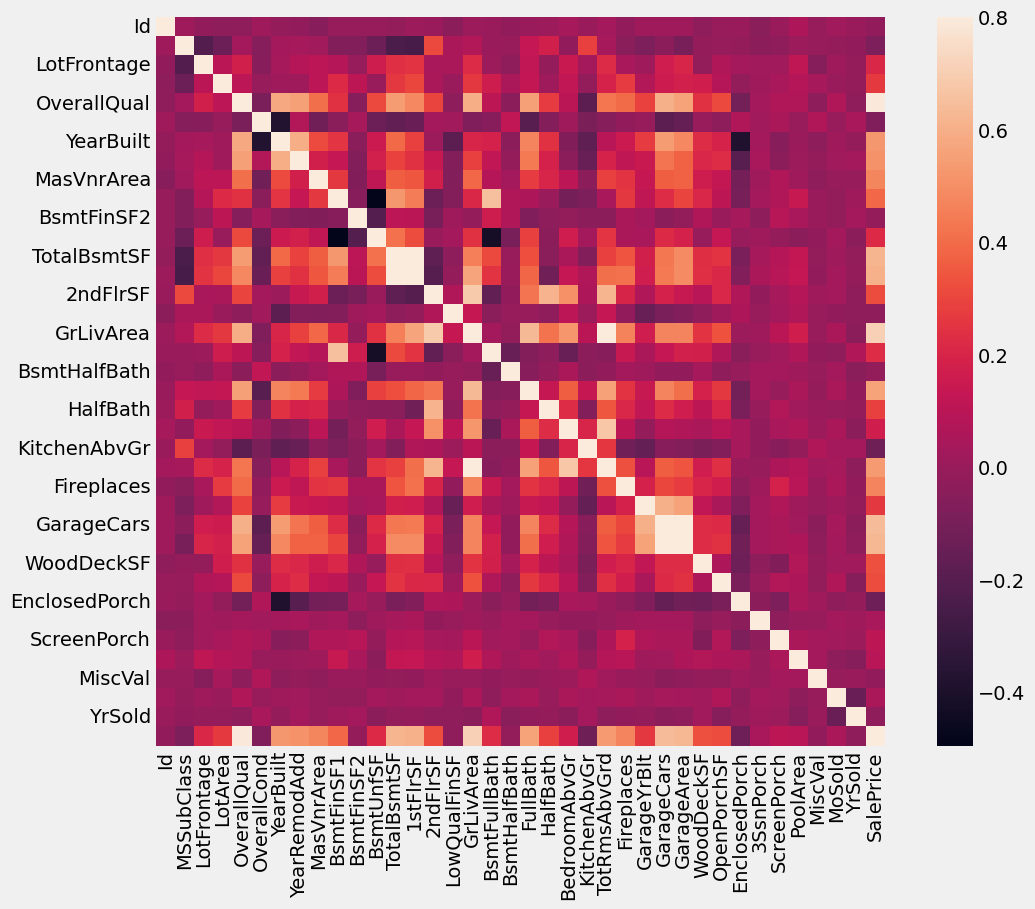

In [64]:

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr,vmax=.8,square=True)
plt.show()

#### Categorical VS Continouse

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


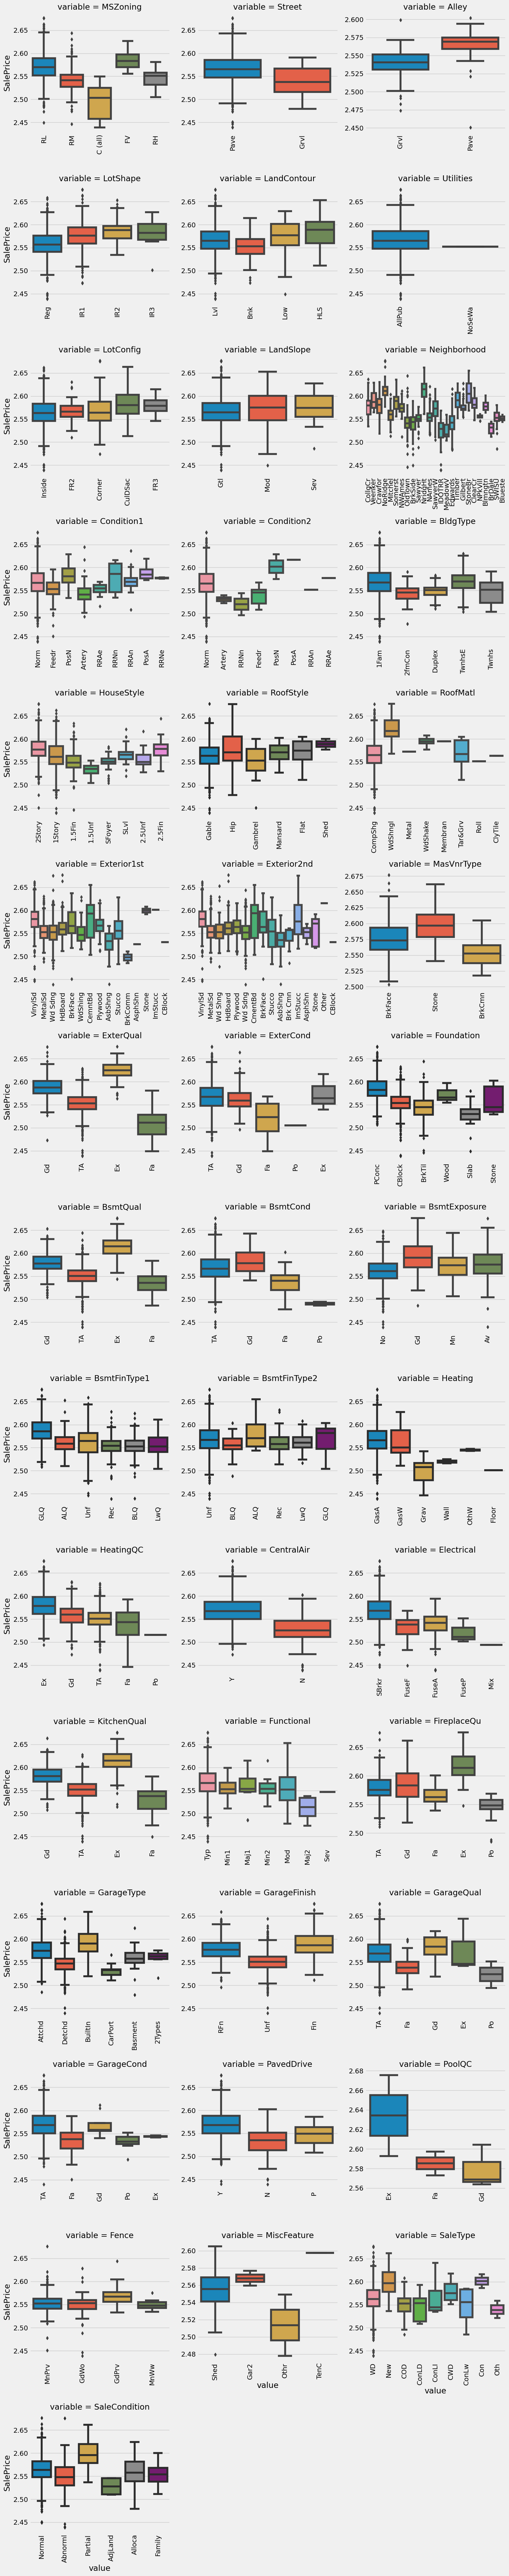

In [66]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)

f=pd.melt(df,id_vars=['SalePrice'], value_vars=categorical_col_idx)
g=sns.FacetGrid(f,col="variable",col_wrap=3,sharex=False,sharey=False,height=5)
g=g.map(boxplot,"value","SalePrice")
plt.show()

# Step 4: Missing Value Analysis

In [72]:
#First approch to finf missing number
import missingno as msno

<Axes: >

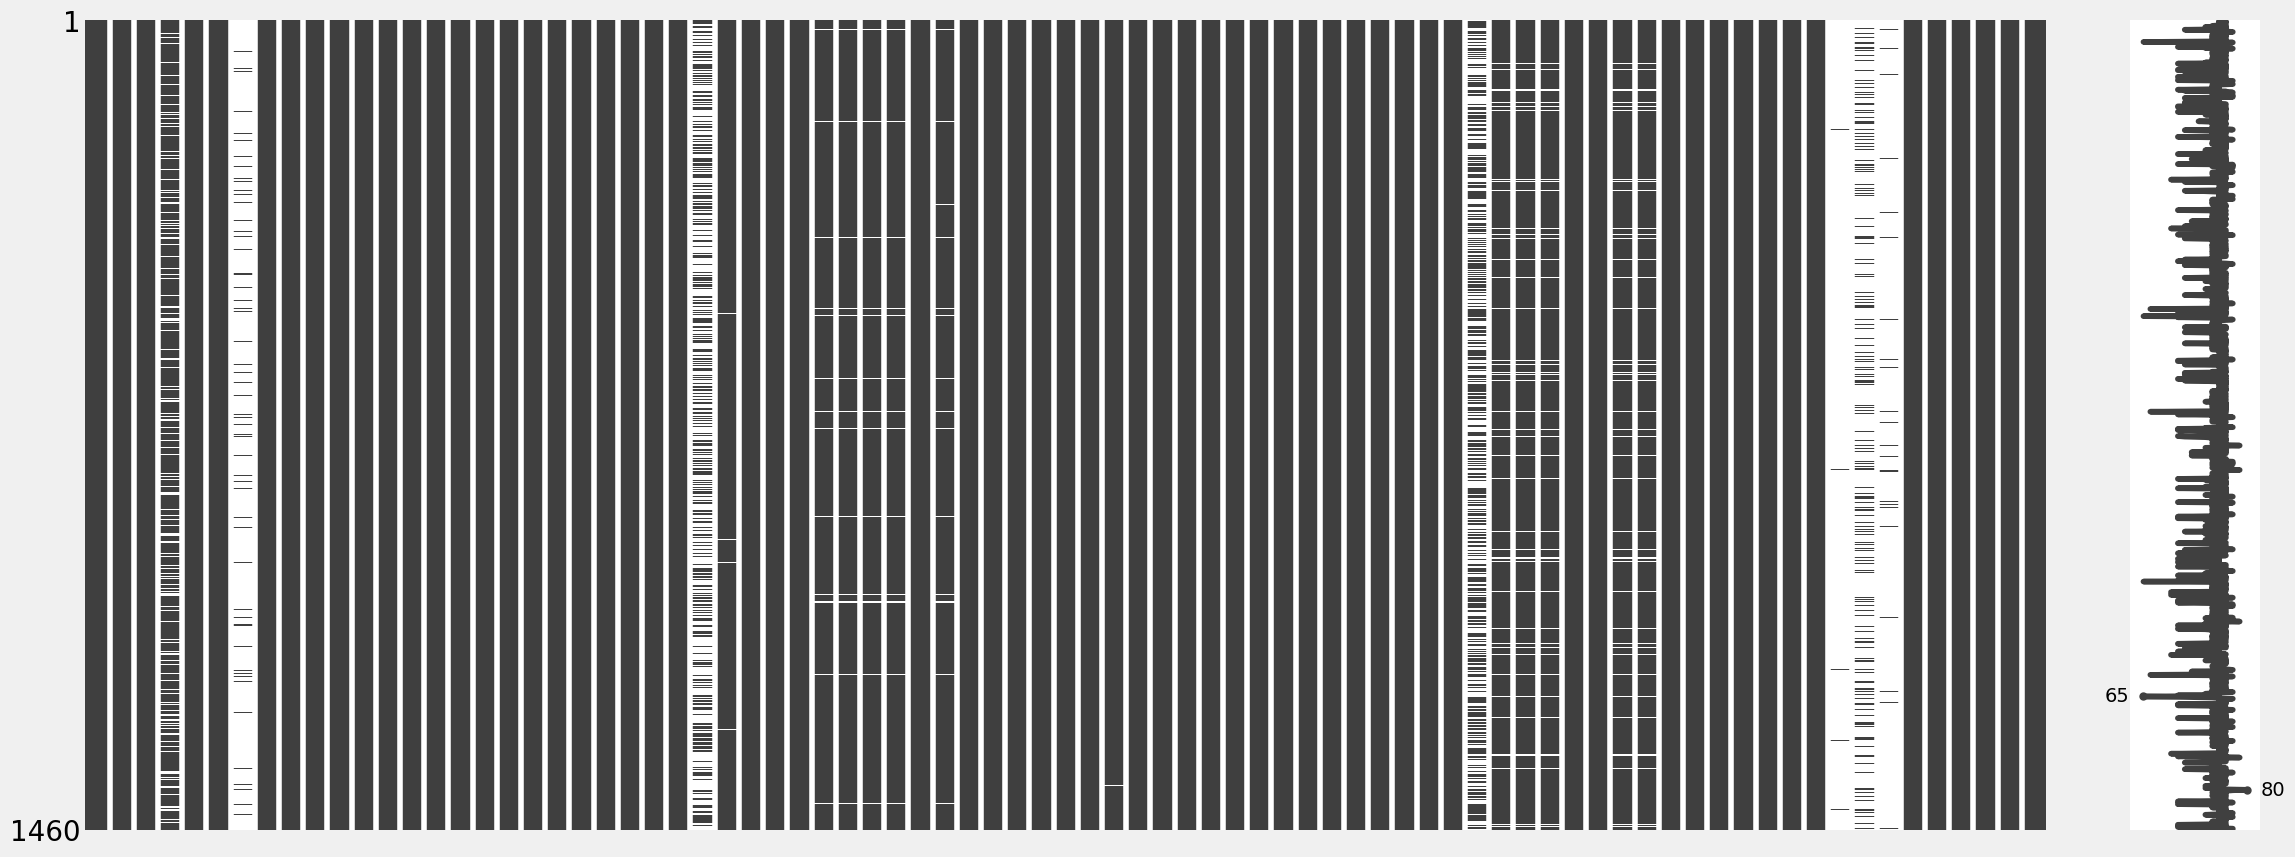

In [73]:
msno.matrix(df)

In [74]:
#Second approch
def missing_value_scanner(df):
    sorted_null_value= df.isnull().sum().sort_values(ascending=False)
    total=sorted_null_value[sorted_null_value!=0]
    
    percent =round(sorted_null_value/len(df)*100,2)[round(sorted_null_value/len(df)*100,2)!=0]
    
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

missing_value_scanner(df)

Total  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
MasVnrType      872    59.73
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageYrBlt      81     5.55
GarageCond       81     5.55
GarageType       81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
BsmtFinType2     38     2.60
BsmtExposure     38     2.60
BsmtQual         37     2.53
BsmtCond         37     2.53
BsmtFinType1     37     2.53
MasVnrArea        8     0.55
Electrical        1     0.07

In [79]:
# Handling missing values (by none) and all these are categorical variable
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    df[i]=df[i].fillna('None')

In [80]:
# Handleing missing values (by 0) and all these are Numerical variable
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']
for i in missing_val_col2:
    df[i]=df[i].fillna(0)

In [81]:
missing_value_scanner(df)

Total  Percent
LotFrontage    259    17.74
Electrical       1     0.07

In [86]:
# # Handling null value
df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))

In [83]:
missing_value_scanner(df)

Total  Percent
Electrical      1     0.07

In [84]:
# Handling null value
df["Electrical"]=df["Electrical"].fillna("SBrkr")

In [85]:
missing_value_scanner(df)

Empty DataFrame
Columns: [Total, Percent]
Index: []

so, now there is no null value in this dataset 

# Step 5: Outlier Analysis

In [87]:
# Based on the above plot i have choose the var called "GrLivArea"
df=df[df["GrLivArea"]<4000]

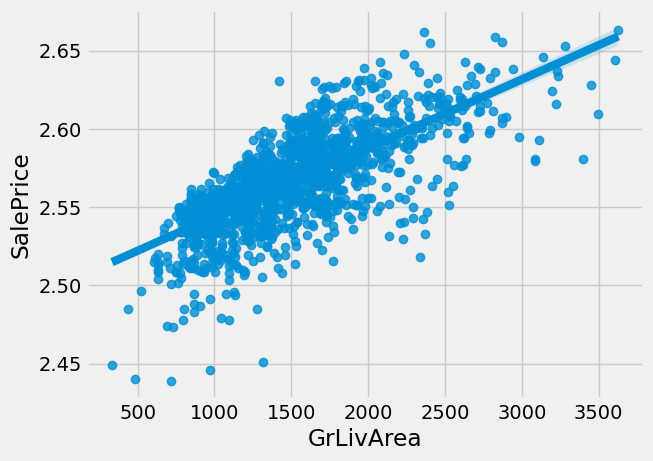

In [88]:
sns.regplot(x="GrLivArea",y="SalePrice",data=df)
plt.show()

# Step 6: Variable Transformation

In [96]:
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [101]:
#Identify the skewness within the varible

def fix_skewness(df):
    skewed_feat=df[numeric_col].apply(lambda x:skew(x)).sort_values(ascending=False)
    high_skew=skewed_feat[abs(skewed_feat)>0.5]
    skewed_features=high_skew.index

# and if skewness then it fix that with the help of box cox tranformation    
    for feat in skewed_features:
        df[feat]=boxcox1p(df[feat],boxcox_normmax(df[feat]+1))

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\2057564824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['1stFlrSF'])


<Axes: xlabel='1stFlrSF', ylabel='Density'>

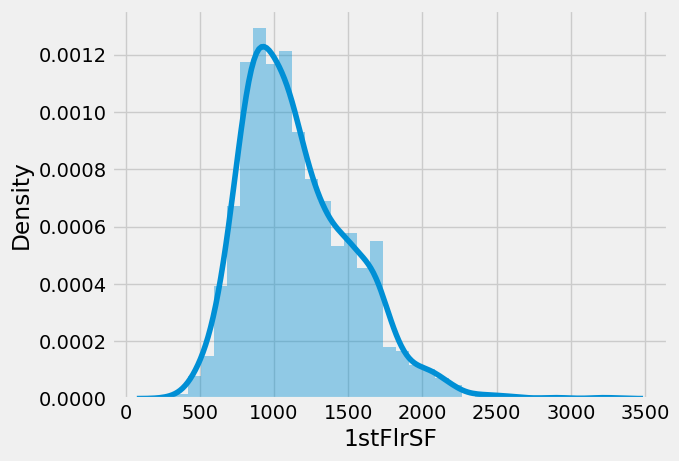

In [108]:

sns.distplot(df['1stFlrSF'])

In [109]:

fix_skewness(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\391552159.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))
C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\2057564824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['1stFlrSF'])


<Axes: xlabel='1stFlrSF', ylabel='Density'>

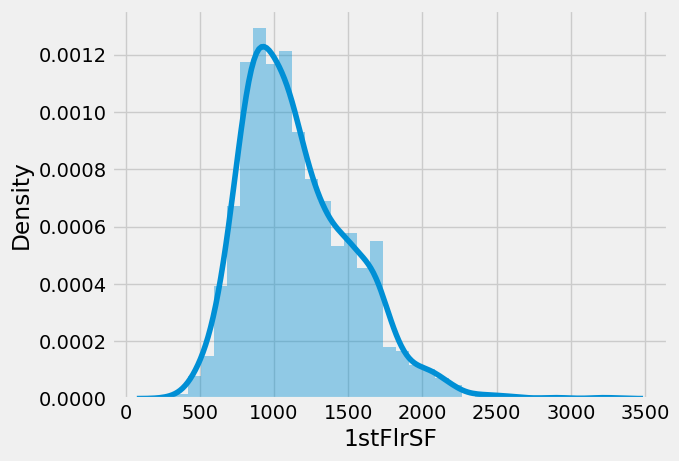

In [110]:

sns.distplot(df['1stFlrSF'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\322533577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GrLivArea'])


<Axes: xlabel='GrLivArea', ylabel='Density'>

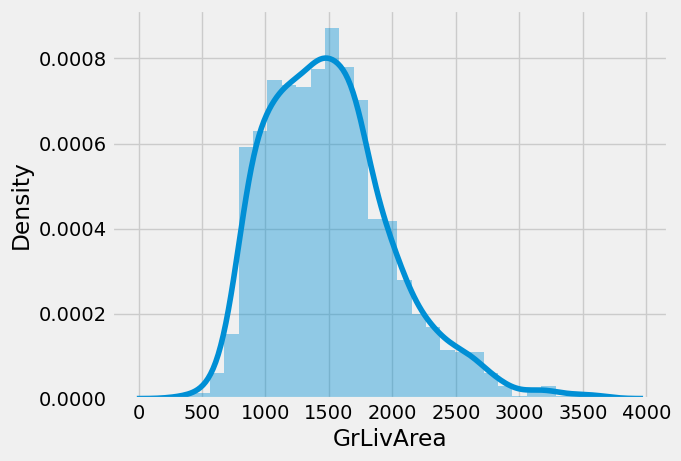

In [111]:

sns.distplot(df['GrLivArea'])

Skewness not removed in any var bez i got an error

# Step 7: Varible Creation

In [113]:
# All the col in list formate
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [114]:
# New var based on the info gathered

df['haspool']=df['PoolArea'].apply(lambda x:1 if x > 0 else 0)
df['hasGarage']=df['GarageArea'].apply(lambda x:1 if x > 0 else 0)
df['has2ndFlr']=df['2ndFlrSF'].apply(lambda x:1 if x > 0 else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\3315579914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['haspool']=df['PoolArea'].apply(lambda x:1 if x > 0 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_7400\3315579914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hasGarage']=df['GarageArea'].apply(lambda x:1 if x > 0 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_7400\3315579914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [116]:
# To check what values it containsn (whether it has it or not)
df[['haspool','hasGarage','has2ndFlr']]

haspool  hasGarage  has2ndFlr
0           1          1          1
1           1          1          0
2           1          1          1
3           1          1          1
4           1          1          1
...       ...        ...        ...
1455        1          1          1
1456        1          1          0
1457        1          1          1
1458        1          1          0
1459        1          1          0

[1456 rows x 3 columns]